In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
import numpy as np
import umap
from sklearn.cluster import KMeans
import pandas as pd
'''
Variables: 
---------

corpus : list of documents
embeddings : documents embeddings of size NxM (N : number of documents, M : embedding dimension) 
red_emd : reduced embeddings matrix using dimentionality reduction
k : number of clusters
labels : documents labels
pred : list of clustering predicted clusters 

''';

In [2]:
def dim_red(mat, p):
    '''
    Perform dimensionality reduction

    Input:
    -----
        mat : NxM list 
        p : number of dimensions to keep 
    Output:
    ------
        red_mat : NxP list such that p<<m
    '''
    red_mat = umap.UMAP(n_components=p).fit_transform(mat)
  
    return red_mat

In [8]:
def clust(mat, k):
    '''
    Perform clustering

    Input:
    -----
        mat : input list 
        k : number of cluster
    Output:
    ------
        pred : list of predicted labels
    '''
    kmeans = KMeans(n_clusters=k)
    pred = kmeans.fit_predict(mat)
    return pred

In [9]:
def visualize(data,labels): 
    x = data[:,0]
    y = data[:,1]
    plt.figure(figsize=(15,10))
    plt.scatter(x, y, c=pred)  # Vous pouvez changer 'viridis' à d'autres cartes de couleur (colormaps)
    plt.title('Scatter Plot des Deux deux première dimensions ')
    plt.xlabel('Première Colonne')
    plt.ylabel('Deuxième Colonne')
    
    # Affichage du plot
    plt.show()
        

C:\Users\driou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


NMI: 0.46 
ARI: 0.27


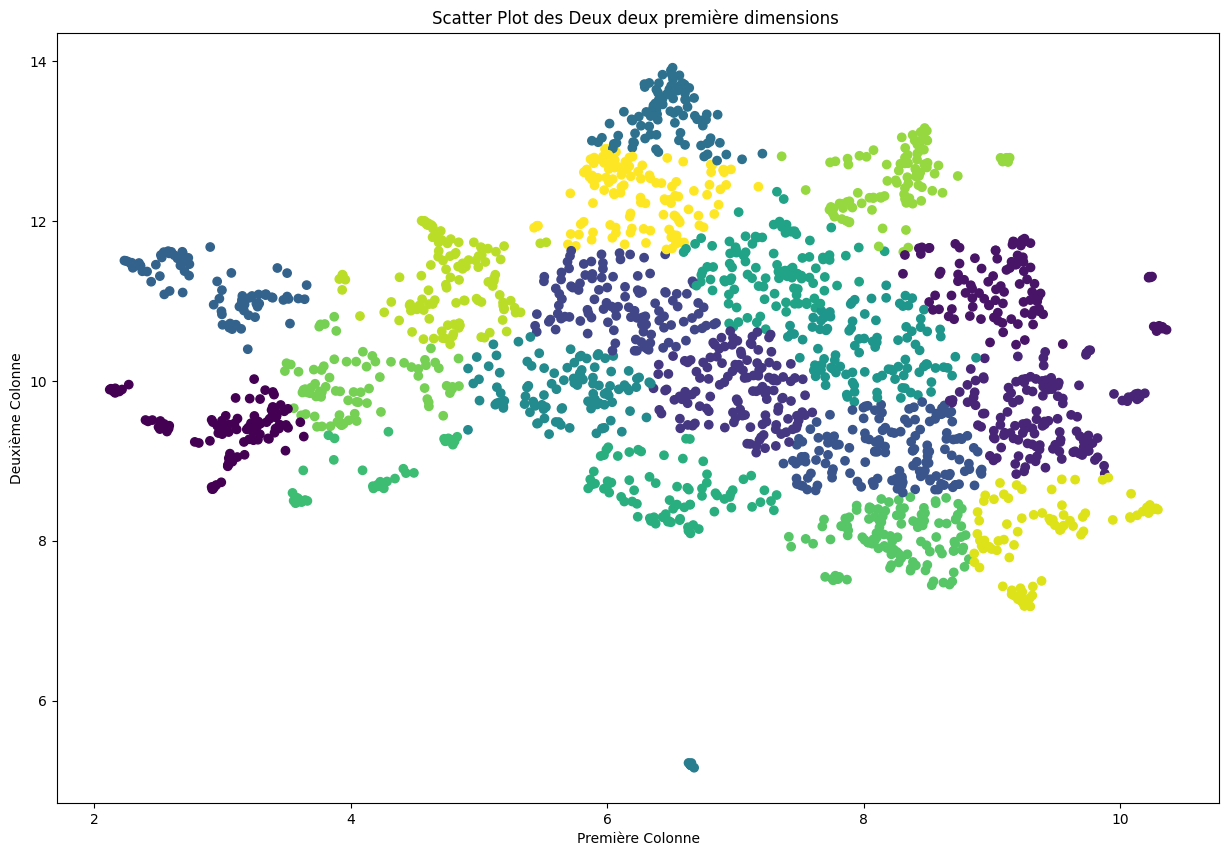

In [11]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

# perform dimentionality reduction
red_emb = dim_red(embeddings, 2)

# perform clustering
pred = clust(red_emb, k)

# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred,labels)
ari_score = adjusted_rand_score(pred,labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')
visualize(red_emb,pred)